In [12]:
import pandas as pd
df=pd.read_csv('c:/data/rides/rides2.csv')
df.head()


,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


In [13]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df["overall"]

In [14]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['overall'])
df2=pd.concat([X_samp,y_samp],axis=1)


In [15]:
df2["overall"].value_counts()

0    245
1    245
Name: overall, dtype: int64

In [16]:
X = X_samp[train_cols] # 독립변수
y = y_samp["overall"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [18]:
from sklearn.tree import DecisionTreeClassifier
# 노드분할전략 - 최선의 변수 선택 전략
# 트리 모형 생성 (기본옵션)
model1 = DecisionTreeClassifier(splitter='best', max_depth=3, random_state=0)
model1.fit(X_train, y_train)
print(" 학습용: ",model1.score(X_train, y_train))
print(" 검증용: ",model1.score(X_test, y_test)) 

 학습용:  0.8494897959183674
 검증용:  0.7857142857142857


In [19]:
# 노드분할전략 - 랜덤 분할 전략
model2 = DecisionTreeClassifier(splitter='random', max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print(" 학습용: ",model2.score(X_train, y_train))
print(" 검증용: ",model2.score(X_test, y_test)) 

 학습용:  0.7270408163265306
 검증용:  0.7244897959183674


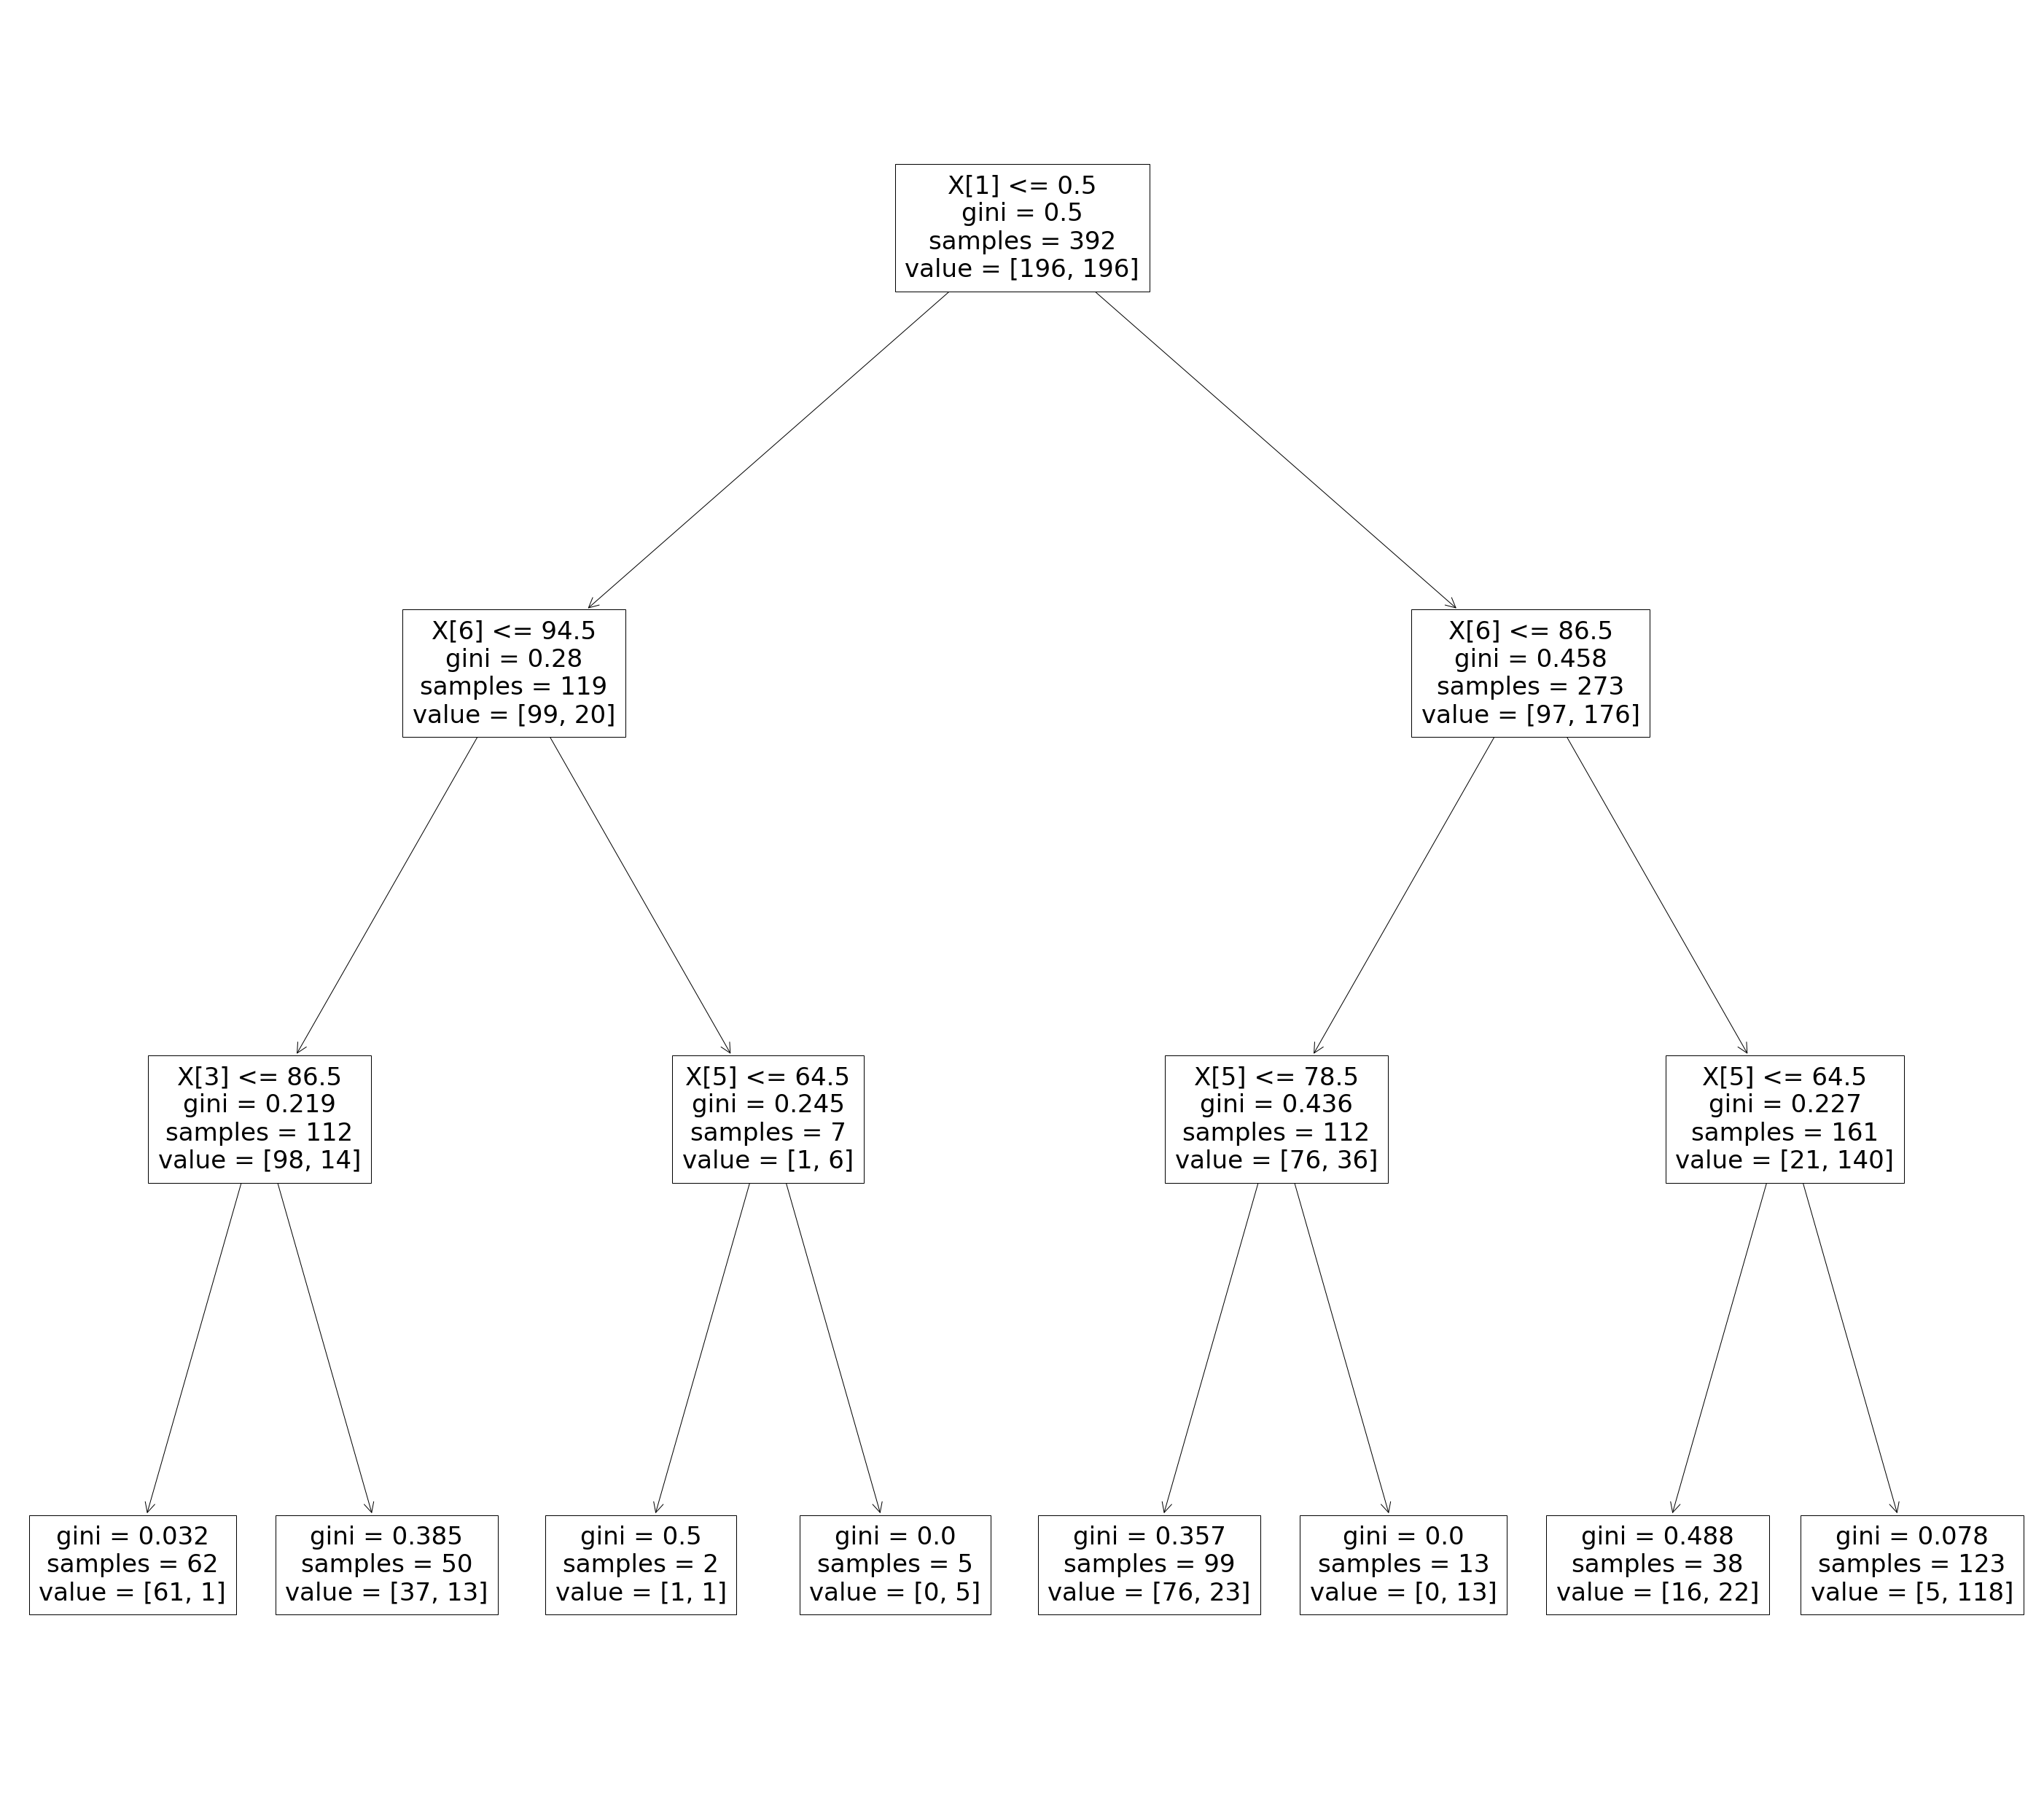

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,45))
tree.plot_tree(model1)
plt.show()

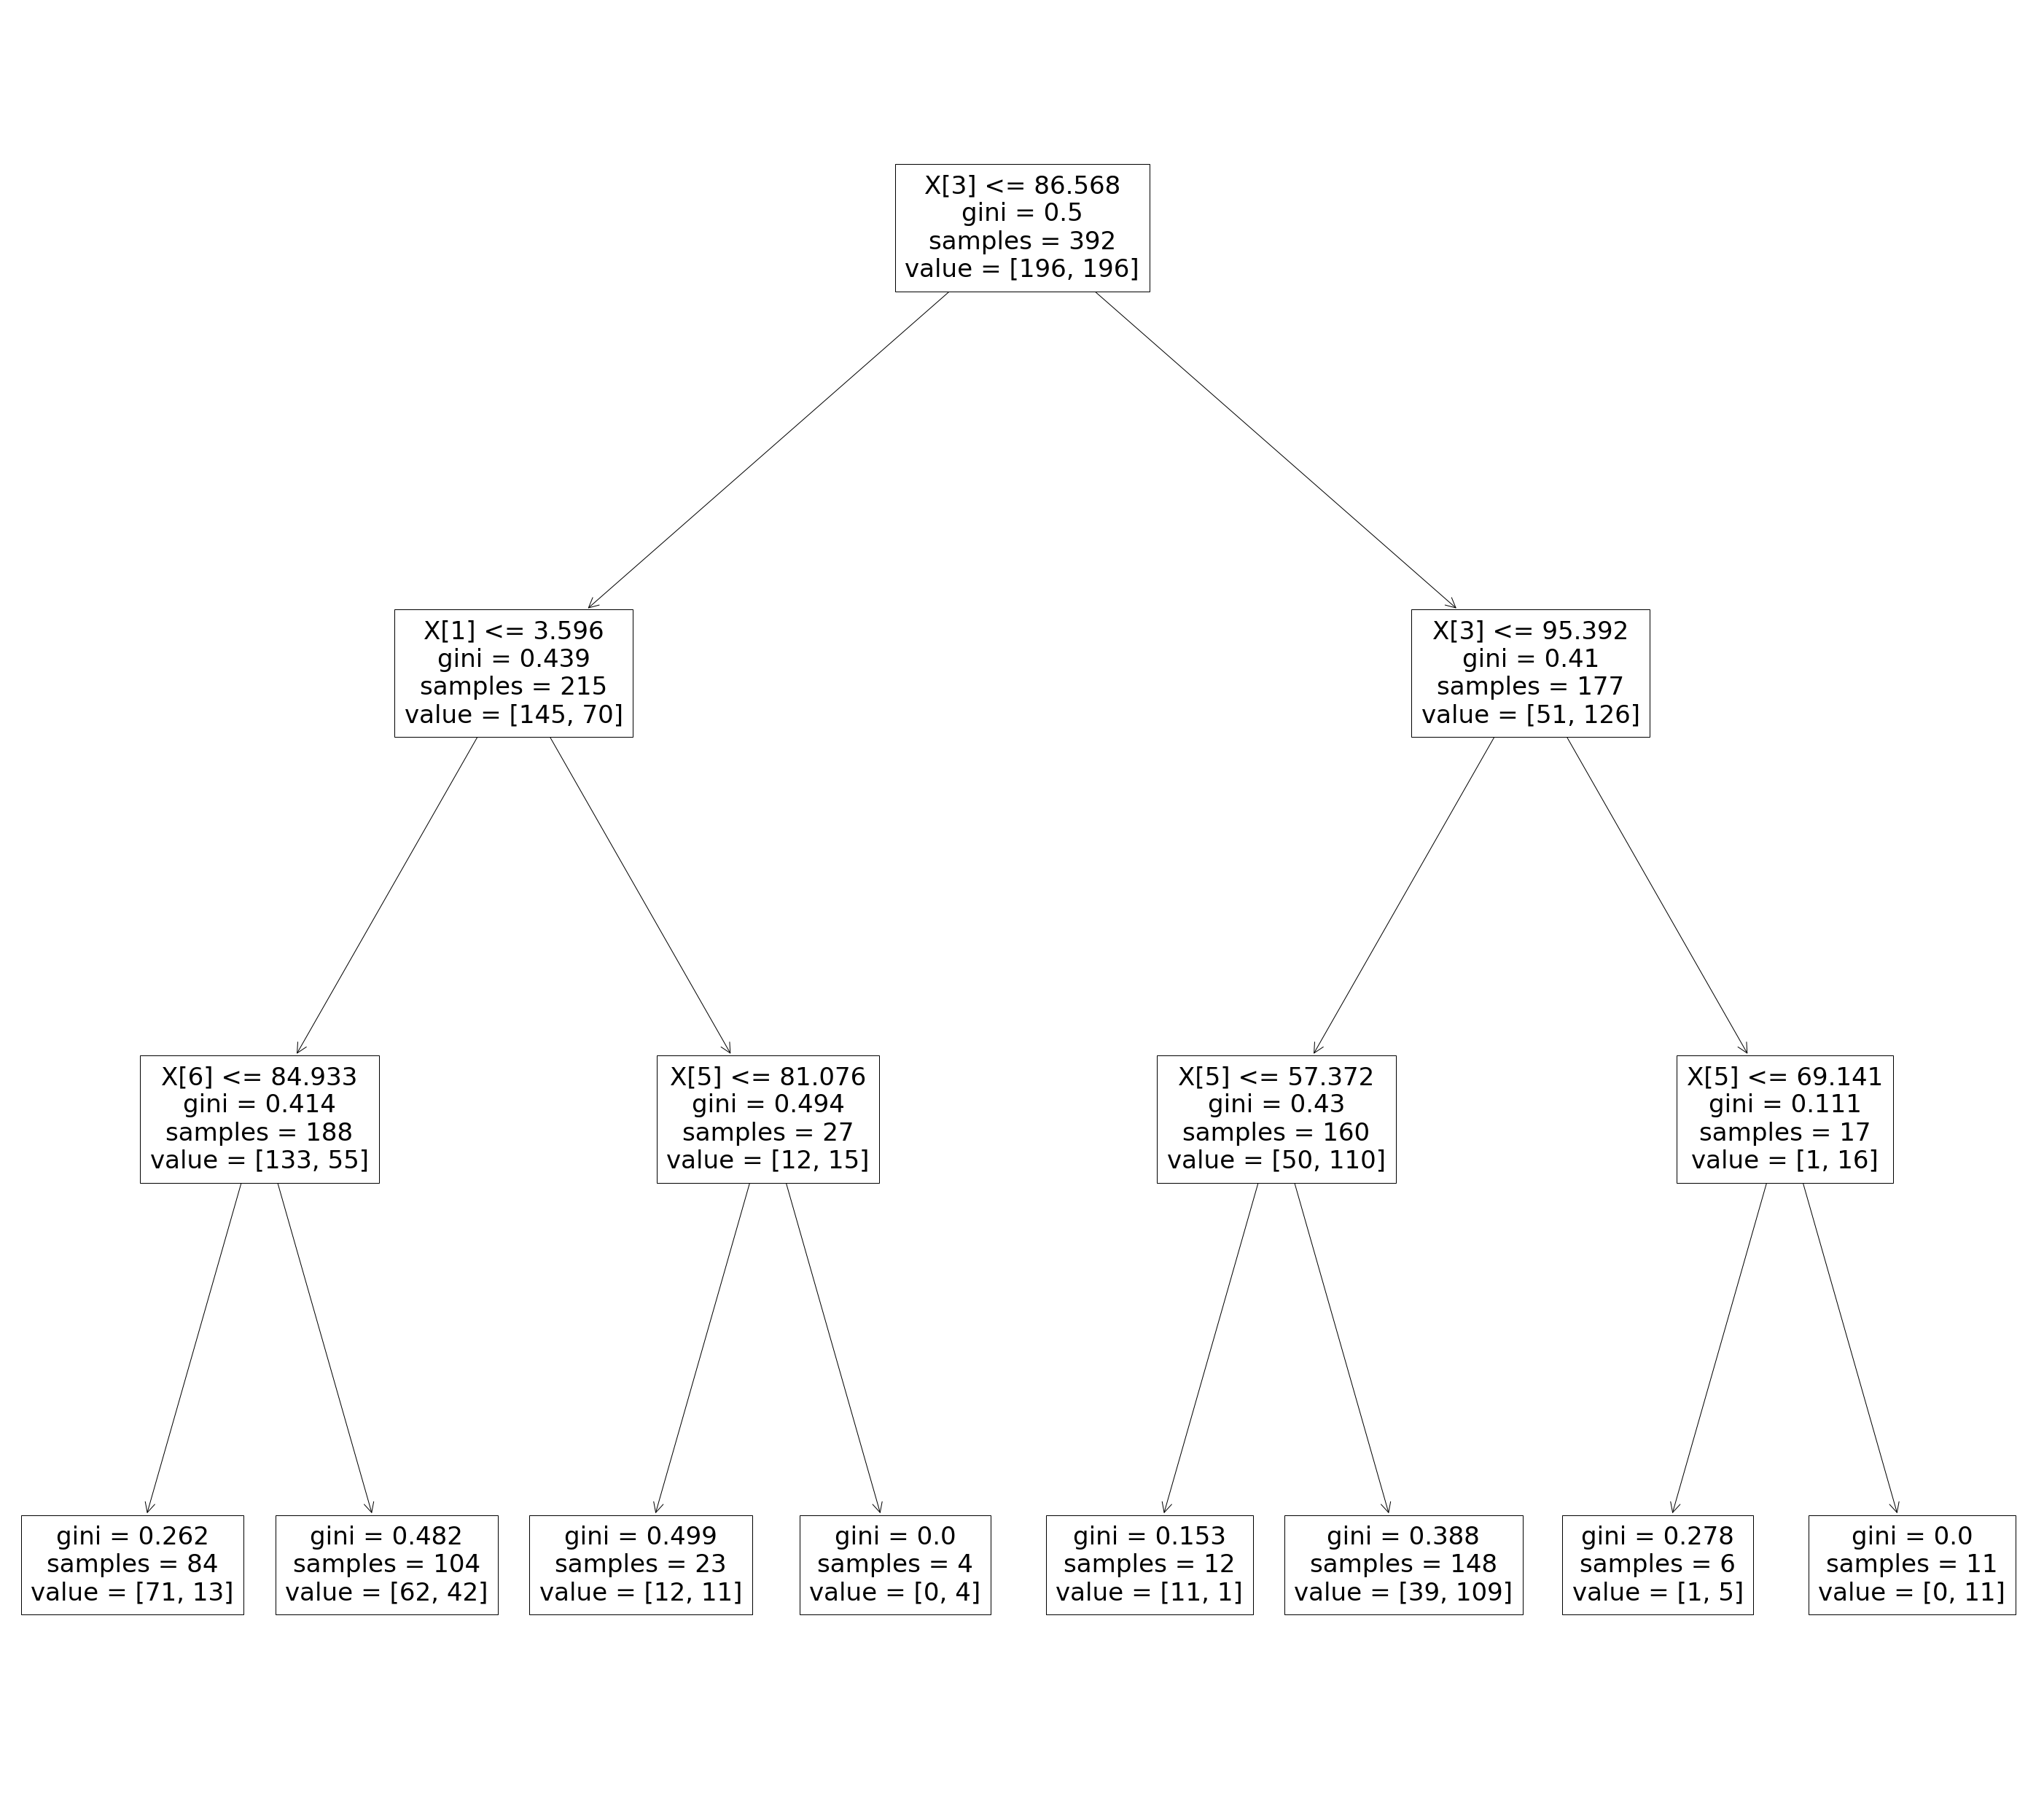

In [21]:
plt.figure(figsize=(50,45))
tree.plot_tree(model2)
plt.show()

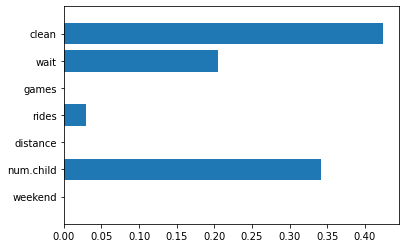

In [22]:
import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.ylim(-1, n_features)

plot_tree(model1)
# 특성 중요도